### **Walktrap Algorithm**

Modularity Score: 0.19399305555555557


<ipython-input-1-d1418df1ac98>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(set(colors)))


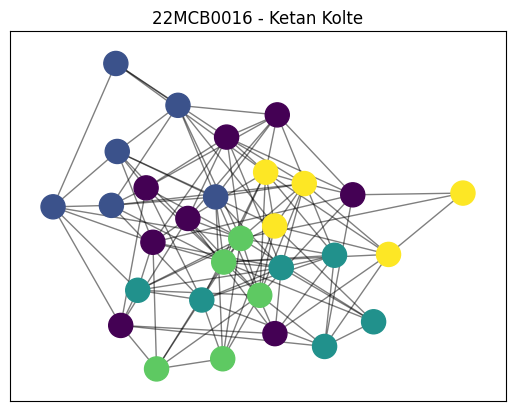

{'Community 1': [17, 23, 5, 7, 9, 11, 12, 15],
 'Community 2': [1, 18, 8, 10, 27, 28],
 'Community 3': [2, 29, 6, 24, 25, 13],
 'Community 4': [16, 20, 21, 22, 14],
 'Community 5': [0, 19, 3, 4, 26]}

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

def modularity_algorithm(G):
  """
  Implements Modularity Algorithm for Community Detection
  :param G: input graph
  :return: dictionary with communities as keys and nodes as values
  """
  # Compute the communities using the Modularity algorithm
  communities = greedy_modularity_communities(G)
  # Create a dictionary with communities as keys and nodes as values
  result = {}
  for i, c in enumerate(communities):
      result[f"Community {i+1}"] = list(c)

  # Create a dictionary mapping each node to its community
  node2community = {}
  for c, nodes in result.items():
      for node in nodes:
          node2community[node] = c

  # Compute the modularity score of the partition
  modularity_score = nx.community.quality.modularity(G, communities)
  print(f"Modularity Score: {modularity_score}")

  # Draw the graph with nodes colored by their community
  pos = nx.spring_layout(G)
  colors = [node2community.get(node) for node in G.nodes()]
  cmap = plt.cm.get_cmap('viridis', len(set(colors)))
  nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=[cmap(int(color[-1])-1) for color in colors])
  nx.draw_networkx_edges(G, pos, alpha=0.5)
  plt.title('22MCB0016 - Ketan Kolte')
  plt.show()

  return result


G = nx.erdos_renyi_graph(n=30, p=0.3)
modularity_algorithm(G)

### **Girvan-Newman Algorithm**

<ipython-input-2-3111fa69ba18>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(set(node2community.values())))


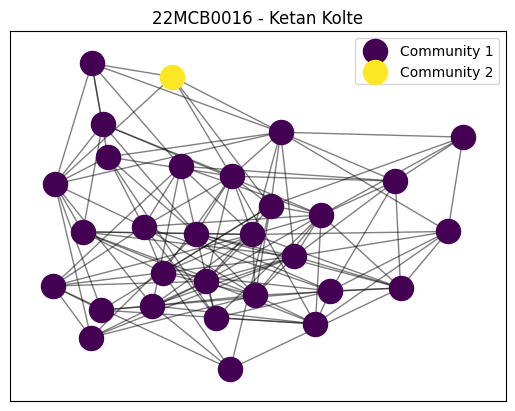

{'Community 1': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  28,
  29],
 'Community 2': [27]}

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def girvan_newman_algorithm(G):
    """
    Implements Girvan-Newman Algorithm for Community Detection
    :param G: input graph
    :return: dictionary with communities as keys and nodes as values
    """
    # Compute the communities using the Girvan-Newman algorithm
    communities = tuple(frozenset(c) for c in next(nx.algorithms.community.centrality.girvan_newman(G)))

    # Create a dictionary with communities as keys and nodes as values
    result = {}
    for i, c in enumerate(communities):
        result[f"Community {i+1}"] = list(c)

    # Create a dictionary mapping each node to its community
    node2community = {}
    for c, nodes in result.items():
        for node in nodes:
            node2community[node] = c

    # Draw the graph with nodes colored by their community
    pos = nx.spring_layout(G)
    cmap = plt.cm.get_cmap('viridis', len(set(node2community.values())))
    for c in set(node2community.values()):
        members = [node for node in node2community if node2community[node]==c]
        nx.draw_networkx_nodes(G, pos, nodelist=members, node_color=[cmap(int(c[-1])-1)], label=c)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title('22MCB0016 - Ketan Kolte')
    plt.legend()
    plt.show()

    return result

# Generate a random graph
G = nx.erdos_renyi_graph(n=30, p=0.3)
girvan_newman_algorithm(G)


### **Fast Greedy Algorithm**

<ipython-input-3-d0835f627653>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(set(node2community.values())))


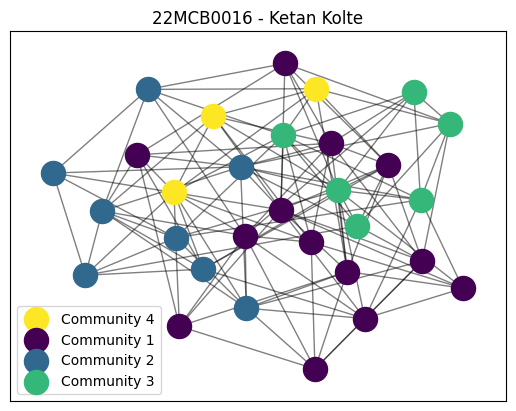

{'Community 1': [0, 1, 5, 7, 9, 10, 15, 17, 18, 20, 21, 26, 27],
 'Community 2': [2, 8, 14, 19, 23, 25, 28, 29],
 'Community 3': [3, 22, 24, 11, 12, 13],
 'Community 4': [16, 4, 6]}

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def fast_greedy_algorithm(G):
    """
    Implements Fast Greedy Algorithm for Community Detection
    :param G: input graph
    :return: dictionary with communities as keys and nodes as values
    """
    communities = nx.algorithms.community.greedy_modularity_communities(G)
    result = {}
    for i, c in enumerate(communities):
        result[f"Community {i+1}"] = list(c)

    # create a dictionary mapping each node to its community
    node2community = {}
    for c, nodes in result.items():
        for node in nodes:
            node2community[node] = c

    # draw the graph with nodes colored by their community
    pos = nx.spring_layout(G)
    cmap = plt.cm.get_cmap('viridis', len(set(node2community.values())))
    for c in set(node2community.values()):
        members = [node for node in node2community if node2community[node]==c]
        nx.draw_networkx_nodes(G, pos, nodelist=members, node_color=[cmap(int(c[-1])-1)], label=c)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title('22MCB0016 - Ketan Kolte')
    plt.legend()
    plt.show()

    return result



# Generate a random graph
G = nx.erdos_renyi_graph(n=30, p=0.3)
fast_greedy_algorithm(G)


### **Spinglass algorithm**

<ipython-input-4-dc760f3e55b8>:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(set(colors)))


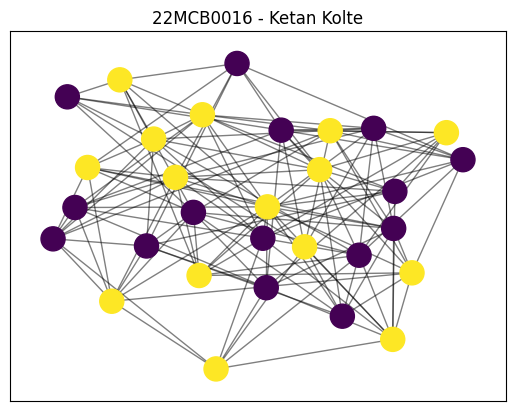

{'Community 1': [13, 10, 2, 12, 28, 26, 4, 24, 29, 7, 1, 5, 17, 18, 20],
 'Community 2': [27, 9, 8, 11, 16, 14, 15, 3, 19, 21, 22, 23, 0, 25, 6]}

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import kernighan_lin_bisection, partition_quality

import numpy as np

def spinglass_algorithm(G):
    """
    Implements Spin Glass Algorithm for Community Detection
    :param G: input graph
    :return: dictionary with communities as keys and nodes as values
    """
    # Set initial partition to be two equal sized communities
    n = len(G.nodes())
    A = set(range(n // 2))
    B = set(range(n // 2, n))

    # Initialize parameters
    beta = 1.0
    delta = 0.01
    max_iter = 100
    iter_count = 0
    best_partition = None
    best_modularity = -1

    while iter_count < max_iter:
        # Assign each node to a community based on its energy
        for node in G.nodes():
            energy_A = 0
            energy_B = 0
            for neighbor in G.neighbors(node):
                if neighbor in A:
                    energy_A += 1
                else:
                    energy_B += 1
            dE = 2 * (energy_B - energy_A)
            p = min(1, np.exp(-beta * dE))
            if np.random.rand() < p:
                if node in A:
                    A.remove(node)
                    B.add(node)
                else:
                    B.remove(node)
                    A.add(node)

        # Calculate modularity of current partition
        partition = [A, B]
        modularity = partition_quality(G, partition)[0]

        # Update the best partition found so far
        if modularity > best_modularity:
            best_partition = partition
            best_modularity = modularity

        # Adjust beta
        if best_partition == partition:
            beta += delta
        else:
            beta -= delta

        iter_count += 1

    # Create a dictionary with communities as keys and nodes as values
    result = {}
    for i, c in enumerate(best_partition):
        result[f"Community {i+1}"] = list(c)

    # Draw the graph with nodes colored by their community
    pos = nx.spring_layout(G)
    colors = [0 if node in A else 1 for node in G.nodes()]
    cmap = plt.cm.get_cmap('viridis', len(set(colors)))
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=[cmap(color) for color in colors])
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title('22MCB0016 - Ketan Kolte')
    plt.show()

    return result



G = nx.erdos_renyi_graph(n=30, p=0.3)
spinglass_algorithm(G)
